# Telecom ML Analysis
<br>

**The goal of the analysis:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Every business is striving to maximize the number of clients. To achieve this goal, not only is it necessary to attract new clients, but it is also important to retain the existing ones. Retaining customers is cheaper for the company than attracting new ones. Apart from that, there is already data available about the interaction of existing customers with the business.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Therefore, by predicting churn rate we can try and retain customers that are about to leave in a timely manner. Relying on the collected data we can attempt to change the customer's decision to leave the carrier.<br>

&nbsp;&nbsp;&nbsp;&nbsp; The analysis includes the following points:
1. EDA *(with calculating basic statistics)*, 
2. Exploring variable relationships and forming hypotheses
3. Building models for predicting churn
4. Comparing the model quality

## Codebook
<br>

`telecom_users.csv` contains the following columns:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – client id<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – client's gender (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – whether the customer is a senior citizen (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – whether the customer is married (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – whether the customer has dependents (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – the time that the customer has been with the company (in months)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – whether the phone service is connected (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – whether the customer is using multiple phone service lines (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – client's internet provider (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – whether the online security service is activated (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – whether the online backup service is activated (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – whether the customer has device protection insurance (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – whether the customer is using tech support (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – whether the customer is using TV streaming (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – whether the customer is using movie streaming (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – the type of the contract (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – whether the customer is using cashless payment methods (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – current monthly charges<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – total charges over the client's tenure<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – whether the customer left (Yes or No)<br>

# 1. Data description

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("telecom_users.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [2]:
sum(df["TotalCharges"] == " ")

10

In [3]:
# the TotalCharges column has 10 missing values
# which will be filled by the column mean
charges = []

for i in df["TotalCharges"]:
    if i != " ":
        charges.append(float(i))

mean_charges = np.mean(charges)

# change the TotalCharges column type to float
df["TotalCharges"] = df["TotalCharges"].replace(" ", mean_charges).astype("float")

In [4]:
import math
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

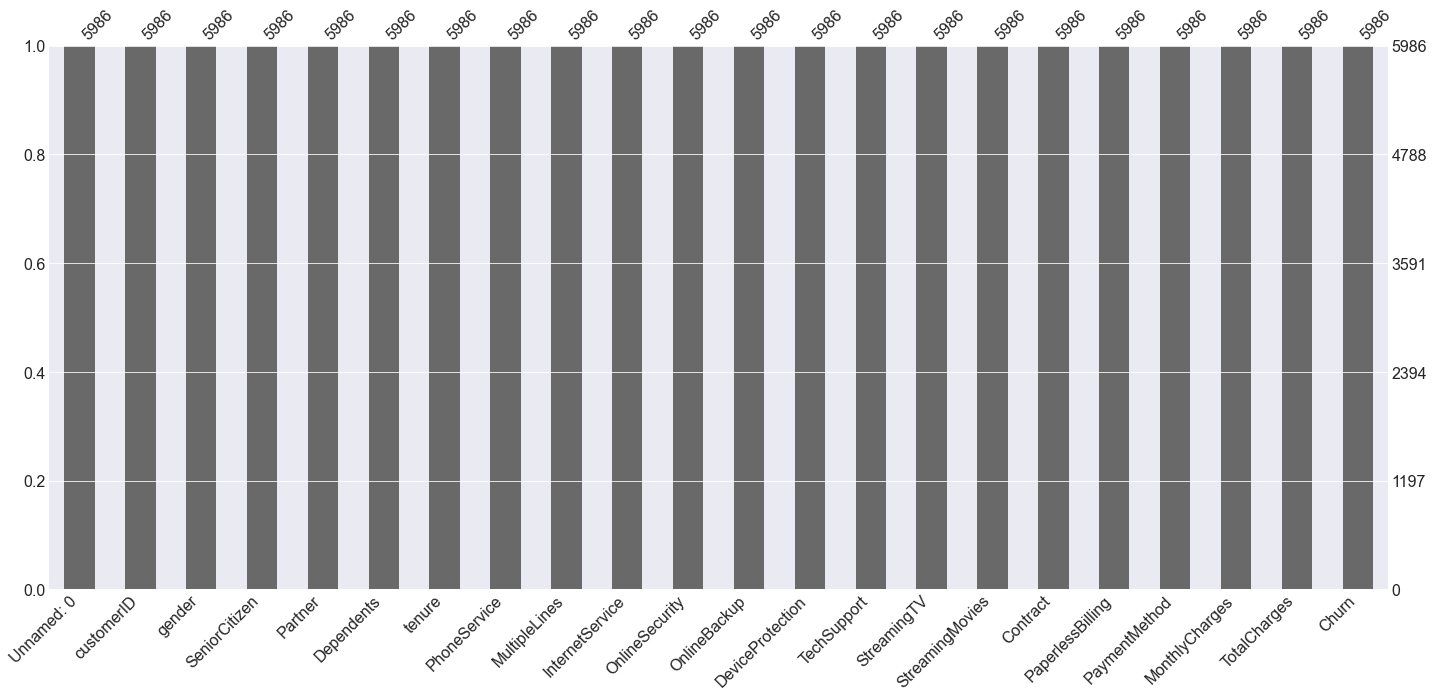

In [5]:
# visualizing missing values by column
msno.bar(df)
plt.show()

In [6]:
# column data types
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# calculating basic statistics for columns with numeric data
df.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2298.060617
std,2035.705666,0.367909,24.516391,30.114702,2272.226516
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,406.275000
50%,3546.500000,0.000000,29.000000,70.400000,1414.550000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [8]:
# calculating basic statistics for columns with text data
df.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,8076-FEZKJ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [9]:
# calculating the customer gender structure
df.groupby("gender").agg({"gender": "count"}) / len(df)

,gender
gender,
Female,0.490478
Male,0.509522


In [10]:
# calculating the percentage of customers using phone service
df.groupby("PhoneService").agg({"PhoneService": "count"}) / len(df)

,PhoneService
PhoneService,
No,0.098563
Yes,0.901437


In [11]:
# calculating the percentage of customers using internet service
df.groupby("InternetService").agg({"InternetService": "count"}) / len(df)

,InternetService
InternetService,
DSL,0.345473
Fiber optic,0.438857
No,0.215670


In [12]:
# calculating customer proportions by contract type
df.groupby("Contract").agg({"Contract": "count"}) / len(df)

,Contract
Contract,
Month-to-month,0.546108
One year,0.213164
Two year,0.240728


In [13]:
# calculating customer proportions by payment type (paper/paperless)
df.groupby("PaperlessBilling").agg({"PaperlessBilling": "count"}) / len(df)

,PaperlessBilling
PaperlessBilling,
No,0.410625
Yes,0.589375


## Data exploration findings

Missing values are not a problem - only 10 records are missing in the `TotalCharges` column.

On average, clients stay with the company for about 32.5 months. The longest tenure is 72 months. Average monthly payment is about 65 USD, ranging from 18.25 to 118.75 USD. The largest total amount paid is approximately 8685 USD. There is a significant difference between the mean (2298 USD) and median (1415 USD) values - it appears that a few clients paid especially large amounts which led to the shift of the mean.

Around the same number of men and women use the service. The overwhelming majority (about 90%) use phone service, around 80% have internet connected. The most popular contract type is monthly, more than half of the customers use paperless payment.

# 2. Exploring variable relationships and forming hypotheses

In [14]:
# changing feature type to numeric for analysis
df["gender"] = df["gender"].apply(lambda x: 0 if x == "Male" else 1)

for service in ["Partner", "Dependents", "PhoneService"]:
    df[service] = df[service].apply(lambda x: 0 if x == "No" else 1)

def classify_service(x):
    if x == "No":
        return 0
    elif x == "Yes":
        return 1
    else:
        return 2

df["MultipleLines"] = df["MultipleLines"].apply(classify_service)


def classify_internet(x):
    if x == "No":
        return 0
    elif x == "DSL":
        return 1
    else:
        return 2

df["InternetService"] = df["InternetService"].apply(classify_internet)

for service in ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                "TechSupport", "StreamingTV", "StreamingMovies"]:
    df[service] = df[service].apply(classify_service)

def classify_contract(x):
    if x == "Month-to-month":
        return 0
    elif x == "One year":
        return 1
    else:
        return 2

df["Contract"] = df["Contract"].apply(classify_contract)

df["PaperlessBilling"] = df["PaperlessBilling"].apply(lambda x: 0 if x == "No" else 1)

def classify_payment(x):
    if x == "Electronic check":
        return 0
    elif x == "Mailed check":
        return 1
    elif x == "Bank transfer (automatic)":
        return 2
    else:
        return 3

df["PaymentMethod"] = df["PaymentMethod"].apply(classify_payment)

df["Churn"] = df["Churn"].apply(lambda x: 0 if x == "No" else 1)

In [15]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,0,0,1,1,72,1,1,0,...,2,2,2,2,2,0,3,24.10,1734.65,0
1,4528,9688-YGXVR,1,0,0,0,44,1,0,2,...,1,0,1,0,0,1,3,88.15,3973.20,0
2,6344,9286-DOJGF,1,1,1,0,38,1,1,2,...,0,0,0,0,0,1,2,74.95,2869.85,1
3,6739,6994-KERXL,0,0,0,0,4,1,0,1,...,0,0,0,1,0,1,0,55.90,238.50,0
4,432,2181-UAESM,0,0,0,0,2,1,0,1,...,1,0,0,0,0,0,0,53.45,119.50,0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

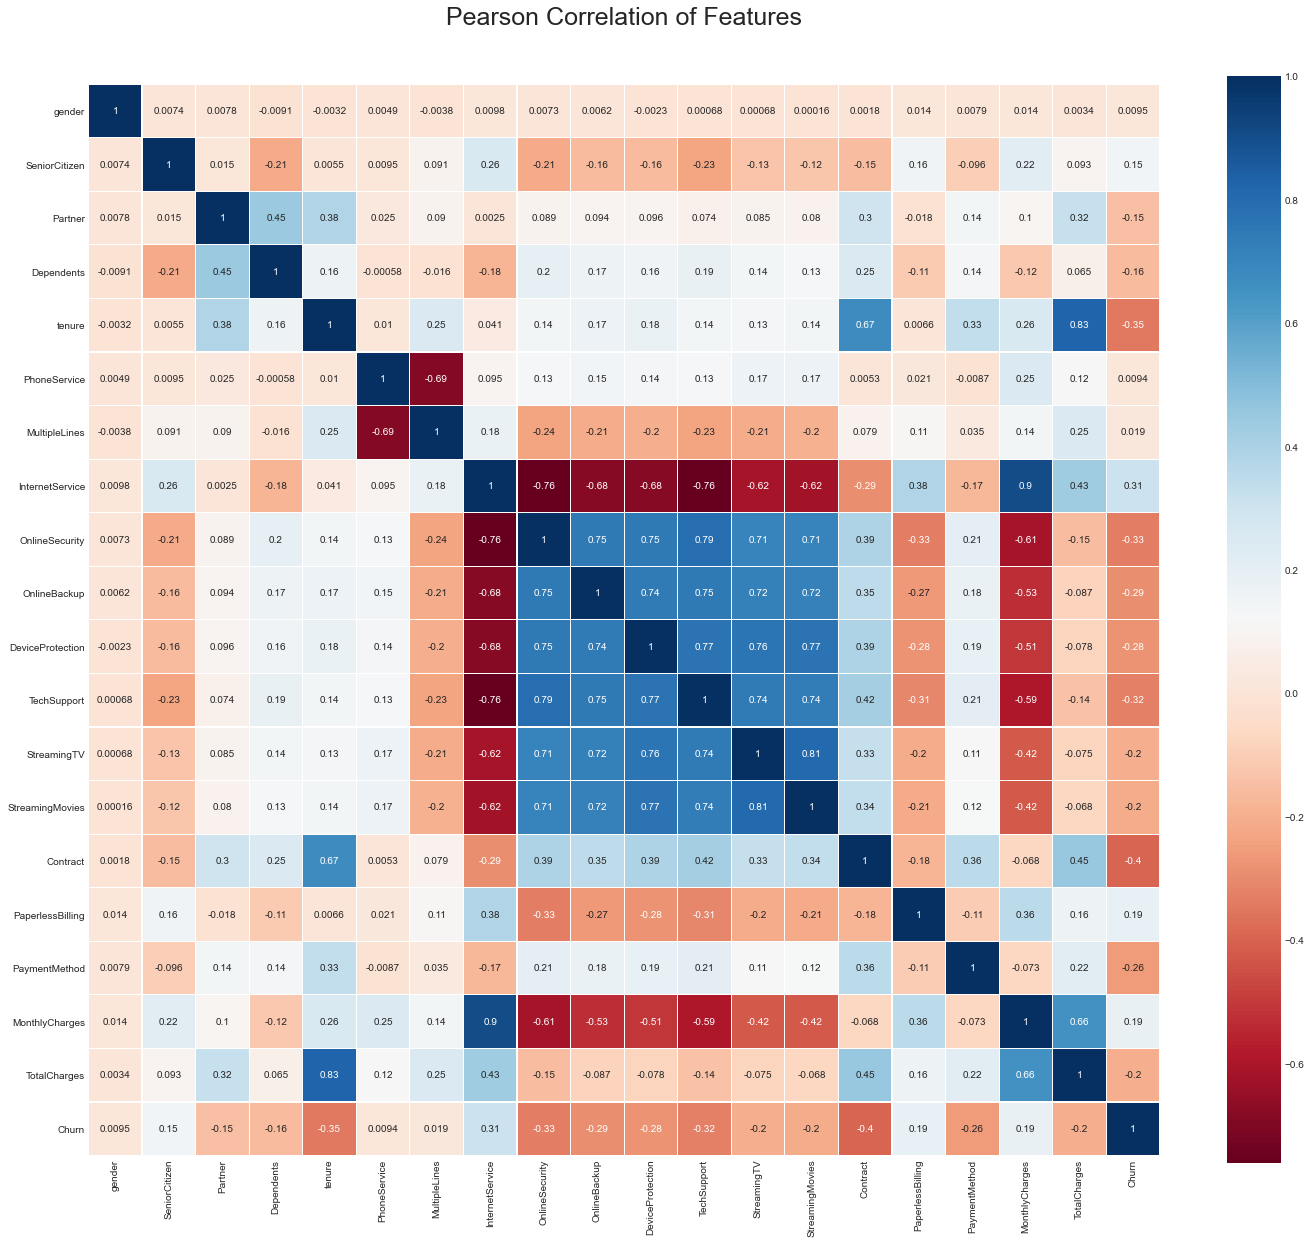

In [17]:
# producing a correlation map for the variables
df_numeric = df.iloc[:, 2:]

colormap = plt.cm.RdBu
plt.figure(figsize=(24, 20))
plt.title('Pearson Correlation of Features', y=1.05, size=25)
sns.heatmap(df_numeric.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

# 3. Building models for churn prediction + 4. Comparing model performance

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

import xgboost
from sklearn.metrics import accuracy_score


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_predict

In [20]:
# the dataset does not have excessively many features, so all
# of them will be used in the analysis
data = df.iloc[:, 2:-1]
target = df["Churn"]

# split data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target,
    random_state=17,
    test_size=0.3
)

In [104]:
# a function to print two top performing algorithms based on the roc_auc_score
def eval_roc_auc(models, model_names):
    
    scores = dict()
    
    for i, model in enumerate(models):
        # train the model and record the quality score into a dictionary
        fit_model = model.fit(x_train, y_train)
        pred = fit_model.predict_proba(x_test)
        scores[model_names[i]] = roc_auc_score(y_test, pred[:, 1])
        
    # print the two top performing algorithms based on roc_auc_score
    scores_sorted = sorted(scores.items(), key=lambda item: item[1], reverse=True)
    print("--------------------------")
    print("Top performing algorithms:")
    print("--------------------------")

    for i in range(2):
        print("  " + scores_sorted[i][0])

In [105]:
# initialize several classifier models
xgb = XGBClassifier(random_state=17)
rfc = RandomForestClassifier(random_state=17)
lr = LogisticRegression(random_state=17)
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier(random_state=17)

models = [xgb, rfc, lr, knn, gbc]
model_names = ["XGBClassifier", "RandomForestClassifier", "LogisticRegression",
               "KNeighborsClassifier", "GradientBoostingClassifier"]

In [106]:
# compare default model performance
eval_roc_auc(models=models, model_names=model_names)

--------------------------
Top performing algorithms:
--------------------------
  XGBClassifier
  GradientBoostingClassifier


XGBoost and Gradient Boosting work best by default. We will conduct GridSearch to identify the best parameters for these two algorithms:

In [107]:
# store the weight ratio in the weight_ratio variable
weight_ratio = sum(df["Churn"] == 0) / sum(df["Churn"] == 1)

# split the data for GridSearch
skf = StratifiedKFold(n_splits=5, random_state=17)

In [108]:
# a function to pick optimal parameters for the model
def pick_params(model, params):
    
    # creating a grid for testing parameters
    grid = GridSearchCV(model, params, cv=skf)
    
    # training with different param combinations
    grid_model = grid.fit(x_train, y_train)
    
    # print the dict with optimal parameters
    print(grid_model.best_params_)

In [109]:
# picking learning_rate and n_estimators for XGBoost
model = XGBClassifier(random_state=17)
params = {"learning_rate": np.arange(0.1, 1, 0.1), "n_estimators": range(10, 100, 10)}

pick_params(model, params)

{'learning_rate': 0.4, 'n_estimators': 10}


In [111]:
model = XGBClassifier(random_state=17, learning_rate=0.4, n_estimators=10)
params = {"learning_rate": [0.35, 0.4, 0.45], "n_estimators": [5, 10, 15]}

pick_params(model, params)

{'learning_rate': 0.4, 'n_estimators': 10}


In [112]:
# picking min_child_weight and max_depth
model = XGBClassifier(random_state=17, learning_rate=0.4, n_estimators=10)
params = {"min_child_weight": range(1, 6), "max_depth": range(1, 6)}

pick_params(model, params)

{'max_depth': 3, 'min_child_weight': 1}


In [114]:
# picking subsample, scale_pos_weight, and gamma
model = XGBClassifier(random_state=17, learning_rate=0.4, n_estimators=10,
                      min_child_weight=1, max_depth=3)
params = {"subsample": np.arange(0.1, 0.6, 0.1), "scale_pos_weight": [1, weight_ratio, 5, 7],
          "gamma": np.arange(0, 0.5, 0.1)}

pick_params(model, params)

{'gamma': 0.0, 'scale_pos_weight': 1, 'subsample': 0.5}


In [123]:
# saving optimal XGBoost parameters into a dictionary
xgb_params = {'learning_rate': 0.4, 'n_estimators': 10, 'max_depth': 3, 'min_child_weight': 1, 
              'gamma': 0, 'scale_pos_weight': 1, 'subsample': 0.5}

In [118]:
# for Gradient Boosting - picking n_estimators
model = GradientBoostingClassifier(random_state=17)
params = {"n_estimators": range(100, 600, 100)}

pick_params(model, params)

{'n_estimators': 100}


In [119]:
model = GradientBoostingClassifier(random_state=17, n_estimators=100)
params = {"n_estimators": range(10, 100, 10)}

pick_params(model, params)

{'n_estimators': 40}


In [120]:
model = GradientBoostingClassifier(random_state=17, n_estimators=40)
params = {"n_estimators": [35, 40, 45]}

pick_params(model, params)

{'n_estimators': 40}


In [121]:
# picking max_depth and min_samples_split
model = GradientBoostingClassifier(random_state=17, n_estimators=40)
params = {"max_depth": range(1, 6), "min_samples_split": range(1, 6)}

pick_params(model, params)

{'max_depth': 3, 'min_samples_split': 2}


In [124]:
# saving the optimal Gradient Boosting parameters into a dictionary
gbc_params = {'n_estimators': 40, 'max_depth': 3, 'min_samples_split': 2}

In [126]:
# check and compare model performance
xgb = XGBClassifier(**xgb_params, random_state=17).fit(x_train, y_train)
pred = xgb.predict_proba(x_test)
print(f"XGBoost ROC-AUC score: {roc_auc_score(y_test, pred[:, 1])}")

XGBoost ROC-AUC score: 0.8302761274205239


In [127]:
gbc = GradientBoostingClassifier(**gbc_params, random_state=17).fit(x_train, y_train)
pred = gbc.predict_proba(x_test)
print(f"Gradient Boosting ROC-AUC score: {roc_auc_score(y_test, pred[:, 1])}")

Gradient Boosting ROC-AUC score: 0.8371469529874702


## Conclusions

As a result of the optimization, 83-83.7% accuracy was obtained based on the ROC-AUC metric with XGBoost and Gradient Boosting. This result was achieved using all the variables provided in the dataset. This accuracy level is acceptable in the telecommunication industry context and the model can be used for improving the company operations and eventual reduction of customer churn.